#Question 2: code your own RBFThis question follows the RBF interpolation example from Bishop (1995). Begin by plotting the functiony= 0.5 + 0.4 sin(2πx) betweenx= 0 andx= 1. Now generate 30 random data points between 0 and 1 andadd Gaussian noise with standard deviation 0.05 to the correspondingyoutput. Plot the resulting pointson the same graph and proceed as follows:•Using the Gaussian RBF given in the lecture andexact interpolation’train’ an RBF network and plotthe resulting fitted curve (in this example you need to keepσsmall to avoid numeric problems).•Now using the identity RBF and (still) exact interpolation, train a new network and fit the resultingcurve. What is the difference between using the different basis functions?•Making use of the k-means algorithm (Python:KMeans; Matlab:kmeans) generate different centresand train a network with both the Gaussian and identity RBF (the pseudoinverse can be calculated inMatlab and Python usingpinv). Experiment with different numbers of centres and think about thevalue you use forσ.•Finally try different RBFs (i.e. multiquadratic, inverse quadratic) andcompare the resulting output.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def f(t):
    return 0.4 * np.sin(2*np.pi*t) +0.5


In [3]:
#Create 30 random number between 0 and 1
k = np.random.random ((30,2)) 
k= np.sort(k,0) #sort x values
for i in range(len(k[:])):
    k[i][1] = f(k[i][0])
    

#Add Gausian noise to output.
mu, sigma = 0, 0.05 # mean and standard deviation
s = np.random.normal(mu, sigma, 30)

for i in range(len(k[:])):
    k[i][1] = k[i][1] + s[i]


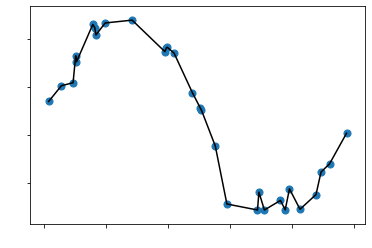

In [106]:
plt.figure()
plt.scatter(k[:,0],k[:,1],s=50);
plt.plot(k[:,0],k[:,1],'k')
plt.tick_params(labelcolor = 'white')



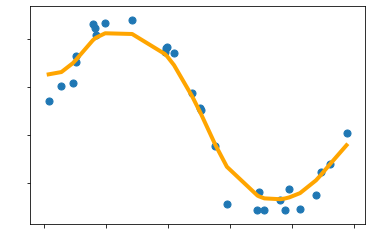

In [107]:
from scipy.interpolate import Rbf
# radial basis function interpolator instance (RBF)
smoothness=5
rbfi = Rbf(k[:,0],k[:,1],function='multiquadric',smooth=smoothness)
u = rbfi(k[:,0])

#Drawing the same scatter plot to compare it.
plt.figure()
plt.scatter(k[:,0],k[:,1],s=50);
plt.plot(k[:,0],u,'orange',linewidth=4)
plt.tick_params(labelcolor = 'white')

#Some different functions:
# 'multiquadric': sqrt((r/self.epsilon)**2 + 1)
# 'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
# 'gaussian': exp(-(r/self.epsilon)**2)
# 'linear': r
# 'cubic': r**3
# 'quintic': r**5
# 'thin_plate': r**2 * log(r)

#I think the best one is multiquadric



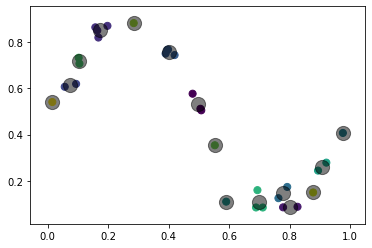

In [180]:
# Making use of the k-means algorithm (Python:KMeans; Matlab:kmeans)
# generate different centresand train a network with both the Gaussian 
# and identity RBF (the pseudoinverse can be calculated inMatlab and Python usingpinv).
# Experiment with different numbers of centres and think about thevalue you use forσ.

#for KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15)
kmeans.fit(k)
y_kmeans = kmeans.predict(k)

plt.scatter(k[:,0],k[:,1],c=y_kmeans, s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [181]:
import pandas as pd
df = pd.DataFrame({'x': centers[:,0], 'y': centers[:,1]})
df = df.sort_values(by='x')
centers = pd.DataFrame(df).to_numpy()



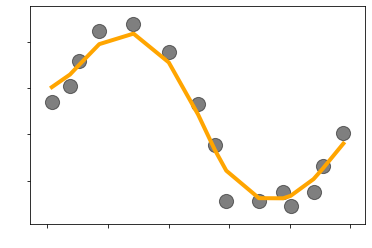

In [182]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
smoothness=0.5
#gaus_const=0.1
rbfi = Rbf(centers[:, 0], centers[:, 1],function='multiquadric', smooth=smoothness, epsilon=gaus_const)
u = rbfi(centers[:,0])
plt.plot(centers[:,0],u,'orange',linewidth=4)
plt.tick_params(labelcolor = 'white')
